# Seaborn - Intro

In [4]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Install and Import Seaborn

In [5]:
import seaborn as sns

In [6]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] =='Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [7]:
df_DA_US = df_DA_US.explode('job_skills')

In [8]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

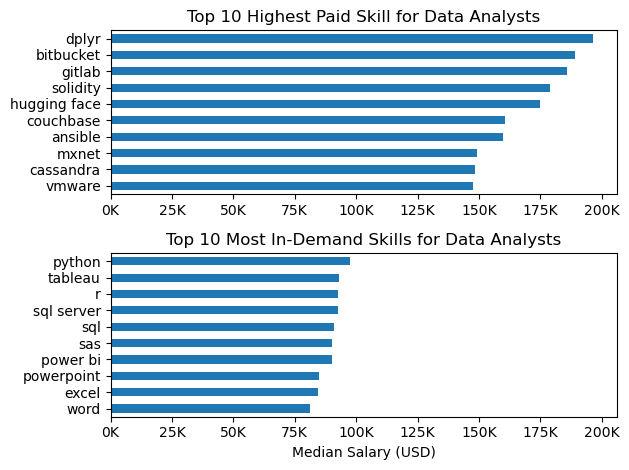

In [9]:
fig, ax = plt.subplots(2, 1)

df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skill for Data Analysts')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

plt.tight_layout()
plt.show()

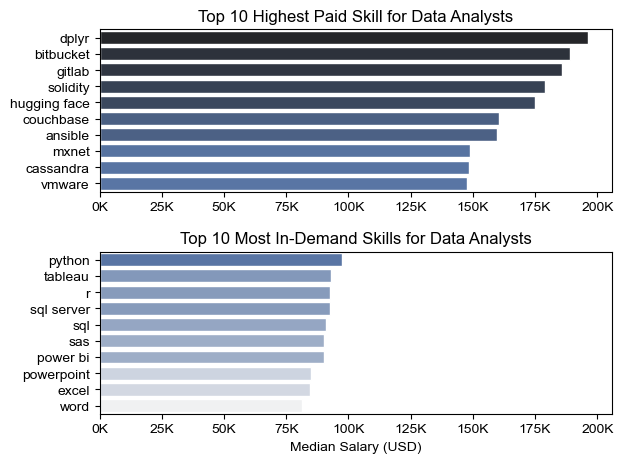

In [16]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')

# Top 10 Highest Paid Skill for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')

#df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skill for Data Analysts')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
ax[0].legend().remove()
# Top 10 Most In-Demand Skills for Data Analysts
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b')

#df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
ax[1].legend().remove()
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number of Jobs')

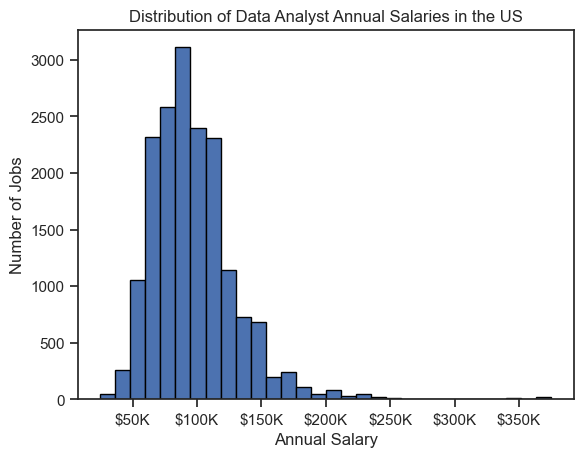

In [19]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')


ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.title('Distribution of Data Analyst Annual Salaries in the US')
plt.xlabel('Annual Salary')
plt.ylabel('Number of Jobs')

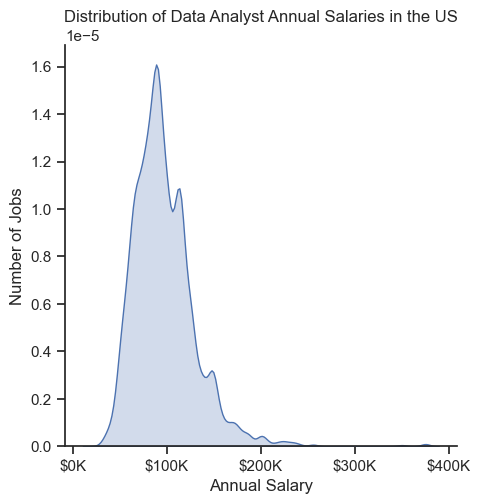

In [44]:
sns.set_theme(style='ticks')
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)


ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


plt.title('Distribution of Data Analyst Annual Salaries in the US')
plt.xlabel('Annual Salary')
plt.ylabel('Number of Jobs')
plt.show()

C:\Users\rbrod\AppData\Local\Temp\ipykernel_4632\2865990902.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


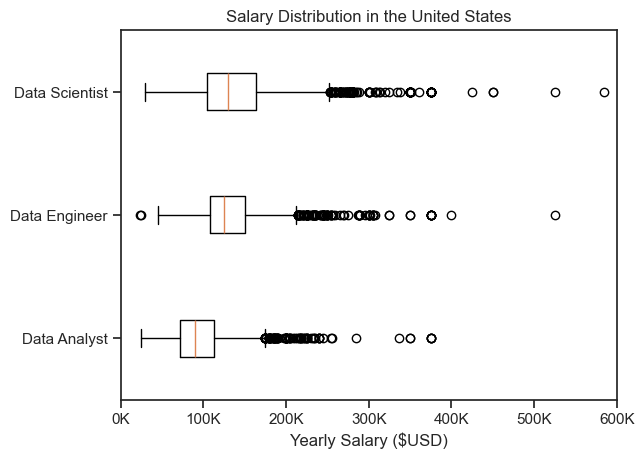

In [27]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job]['salary_year_avg'] for job in job_titles]


plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')

ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
plt.xlim(0, 600_000)
plt.show()

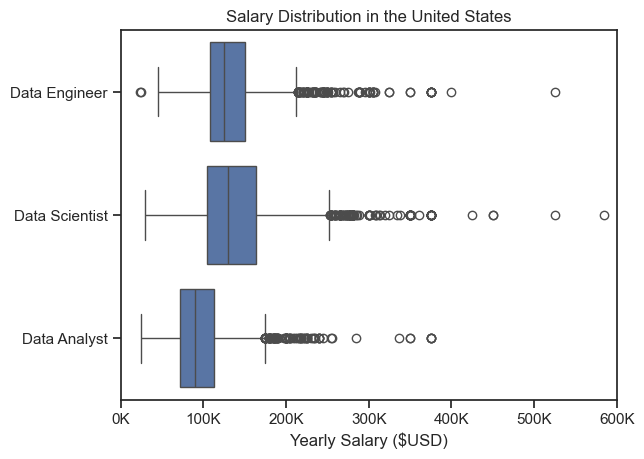

In [29]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')

ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
plt.xlim(0, 600_000)
plt.show()

C:\Users\rbrod\AppData\Local\Temp\ipykernel_4632\1582743651.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5compds, x='salary_year_avg', y='company_name', palette='Blues_r')


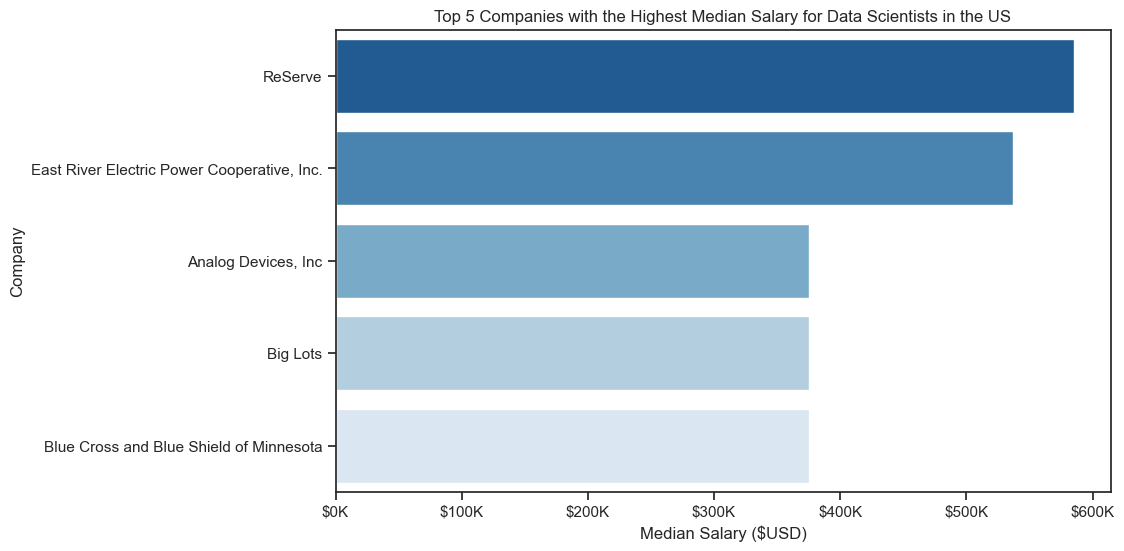

In [35]:
df_DS_US = df[(df['job_title_short'] =='Data Scientist') & (df['job_country'] == 'United States')].copy()

top5compds = df_DS_US.groupby('company_name')['salary_year_avg'].median().nlargest(5).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top5compds, x='salary_year_avg', y='company_name', palette='Blues_r')

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.xlabel('Median Salary ($USD)')
plt.ylabel('Company')
plt.title('Top 5 Companies with the Highest Median Salary for Data Scientists in the US')
plt.show()

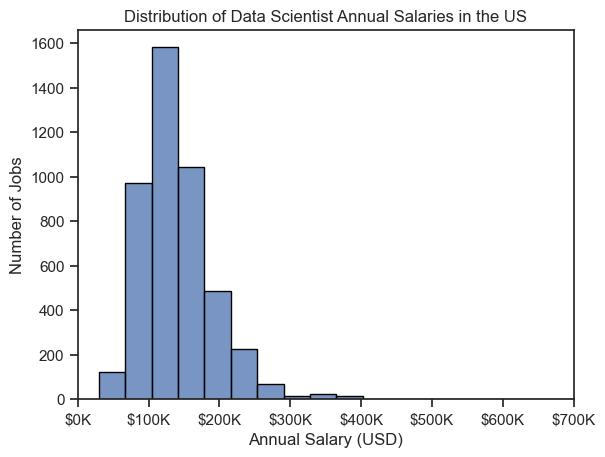

In [36]:
sns.set_theme(style='ticks')
sns.histplot(df_DS_US['salary_year_avg'], bins=25, edgecolor='black')

plt.xlim(0, 700_000)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.title('Distribution of Data Scientist Annual Salaries in the US')
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Number of Jobs')
plt.show()

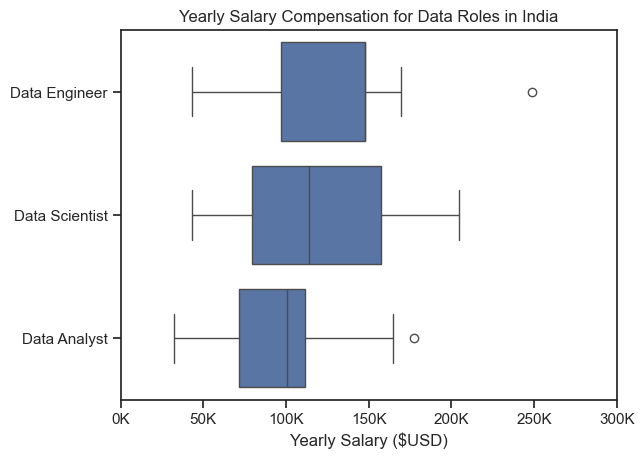

In [47]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_IN = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'India')].copy()

df_IN = df_IN.dropna(subset=['salary_year_avg'])

job_list = [df_IN[df_IN['job_title_short'] == job]['salary_year_avg'] for job in job_titles]


sns.boxplot(data=df_IN, x='salary_year_avg', y='job_title_short')
plt.title('Yearly Salary Compensation for Data Roles in India')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')

ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
plt.xlim(0, 300_000)
plt.show()

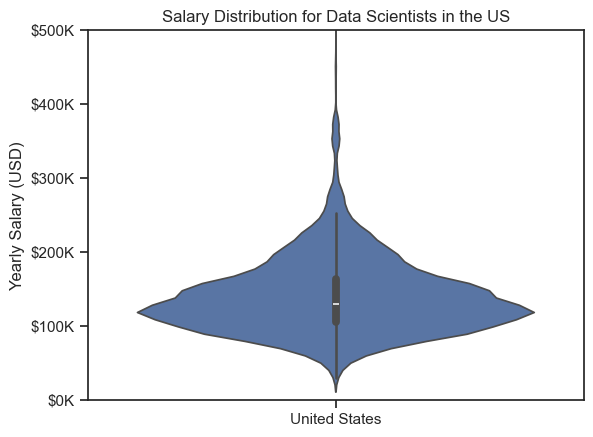

In [52]:
sns.set_theme(style='ticks')
sns.violinplot(data=df_DS_US, x='job_country', y='salary_year_avg')

ax= plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1000)}K'))

plt.ylim(0, 500_000)

plt.title('Salary Distribution for Data Scientists in the US')
plt.xlabel('')
plt.ylabel('Yearly Salary (USD)')
plt.show()